In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch

import environment as env
import agents as ag
import yaml 
%matplotlib inline 

In [32]:
with open('simulation_config.yml', 'r') as ymlfile:
    cfg = yaml.load(ymlfile)
    
with open('rcParams.yml', 'r') as ymlfile:
    rcParams = yaml.load(ymlfile)
    
analyse_path = "plots/LA_conv_16x16/"
## OR
analyse_abs_path = "/home/corvus/tmp/timeseries/LA_conv/"

In [5]:
mpl.rcParams.update(rcParams['rcParams'])

In [33]:
if analyse_abs_path != "":
    path = analyse_abs_path
else:
    cwd = os.getcwd()
    path = os.path.join(cwd, analyse_path)
    
states = sorted([os.path.join(path, s) for s in os.listdir(path) if "state" in s])

In [52]:
eps_ts = []
for s in states:
    data = torch.load(s)
    for ep in data['epsbatch']:
        eps_ts.append(ep[0])
eps_ts = np.array(eps_ts).T

In [55]:
last = ep  # full data of latest episode
d = ep[1]  # actual data of latest episode
d = np.array(d).T

x = np.arange(len(data['mean_pred_rewards']))

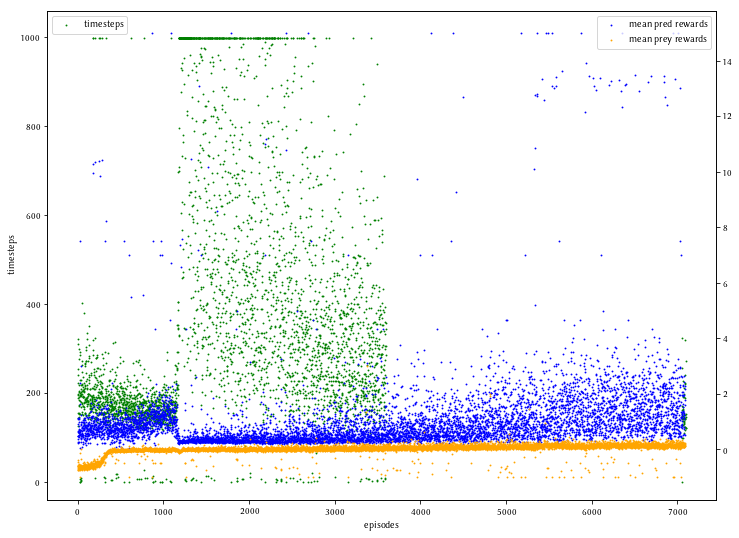

In [54]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(111)

ax1.scatter(*eps_ts, marker='.', s=3, label='timesteps', c='g')
ax1.set_xlabel('episodes')
ax1.set_ylabel('timesteps')
ax1.set_ylim(-40, 1060)
ax1.legend(loc=2)

ax2 = ax1.twinx()
ax2.scatter(x, data['mean_pred_rewards'], marker='.', s=3, c='b', label='mean pred rewards')
ax2.scatter(x, data['mean_prey_rewards'], marker='.', s=3, c='orange', label='mean prey rewards')
ax2.legend(loc=1)

'/home/corvus/docs/uni/bachelor_thesis/code/Imazalil/actor-critic/plots/LA_conv_16x16/'